### Imports

This notebook uses `sktime`

In [11]:
import sys

import matplotlib.pyplot as plt
import json

# import dysts
# from dysts.flows import *
# from dysts.base import *
# from dysts.utils import *
# from dysts.analysis import *

import pandas as pd
import seaborn as sns
import numpy as np

import degas as dg
dg.set_style()

# try:
#     from private.lyap import lyap_r, lyap_e, corr_dim
# except:
#     from nolds import lyap_r, lyap_e, corr_dim

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run experiments

In [8]:
%%bash

python3 sweep_surrogate_transfer_learning.py

Process is terminated.


# Import experiment results

score_transfer    0.844231
score_tsfresh     0.808389
score_random      0.820000
dtype: float64


<AxesSubplot:>

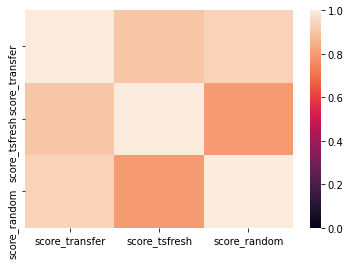

In [8]:
import json
from scipy.stats import sem 
semd = lambda x, **kwargs : 1.253 * sem(x, **kwargs)

with open("./results/transfer_learning.json", "r") as file:
    all_scores = json.load(file)
model_names = ["score_tsfresh", "score_random", "score_transfer"]

data = pd.DataFrame(all_scores).transpose()
print(data.median())

sns.heatmap(data.corr(), vmin=0, vmax=1)

In [9]:
from scipy import stats

print(
    stats.ttest_rel(
        data["score_tsfresh"], 
        data["score_transfer"], 
        nan_policy="omit"
    )
)

print(
    stats.ttest_rel(
        data["score_random"], 
        data["score_transfer"], 
        nan_policy="omit"
    )
)

# Compare the two cases without transfer learning
print(
    stats.ttest_rel(
        data["score_tsfresh"], 
        data["score_random"], 
        nan_policy="omit"
    )
)

Ttest_relResult(statistic=-4.081263497860437, pvalue=9.750402639559969e-05)
Ttest_relResult(statistic=-5.178450960871579, pvalue=1.3777714930915225e-06)
Ttest_relResult(statistic=0.20275019613607062, pvalue=0.8397930766041061)


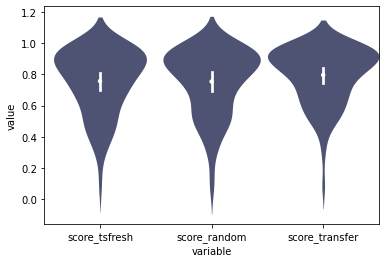

In [26]:
 
data_long = pd.melt(data, value_vars=model_names)
ax = sns.violinplot(data=data_long,  x="variable", y="value",  
              linewidth=0, size=3, alpha=0.1, split=True, 
                    width=1,
                    order=model_names,
                    scale="area", inner=None, 
                    color=[71/255., 78/255., 123/255.],
                   )
    
ax = sns.pointplot(data=data_long, x="variable", y="value", 
                   order=model_names,
              linewidth=0, 
                   size=0.1, 
                   scale = 0.5,
                   palette={ "w"}, 
                   join=False, ci=99)


# Scaling experiments and plots

In [ ]:
%%bash 

python sweep_surrogate_transfer_learning.py

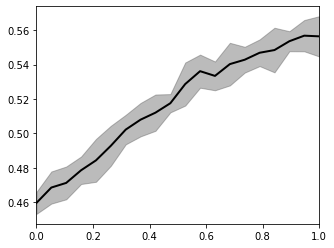

In [12]:
## plot results vs sota
from scipy.stats import sem, median_abs_deviation

semd = lambda x, **kwargs : 1.2533 * sem(x, **kwargs)

all_vals = np.loadtxt('./results/sweep_surrogate_data.csv')

med_vals = np.median(all_vals, axis=0)
dev_vals = median_abs_deviation(all_vals, axis=0, scale="normal")
# plt.plot(med_vals)
# plt.plot(med_vals + dev_vals)
# plt.plot(med_vals - dev_vals)
dg.plot_err(med_vals, dev_vals, x=np.linspace(0, 1, len(med_vals)), linewidth=2)
plt.xlim([0, 1])


dg.fixed_aspect_ratio(1/1.3)


# dg.better_savefig("../private_writing/fig_resources/data_scaling.png", dpi=600)